In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
# convert job_skills STR type to LIST type
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Only get data analyst jobs:
df_DA = df[df['job_title_short']== 'Data Analyst'].copy()

# Drop NaN values from 'salary_year_avg' for plotting
df_DA  = df_DA.dropna(subset=['salary_year_avg'])

In [6]:
df_DA.salary_year_avg.sample(5)

305311    112500.0
206334    145000.0
433909    100500.0
239735    116393.0
71793      77981.0
Name: salary_year_avg, dtype: float64

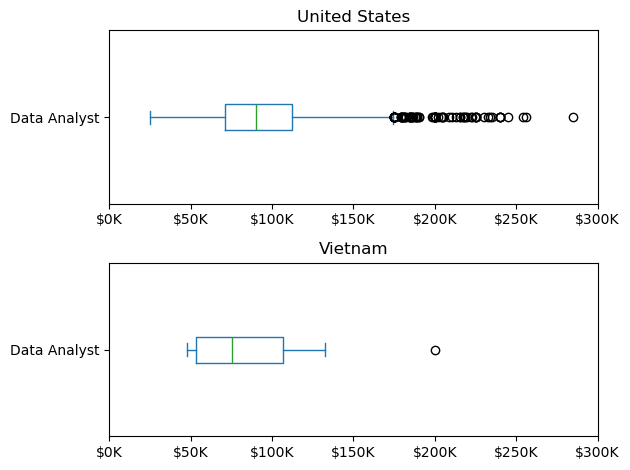

In [4]:
# Creatting subplots for 2 countries: US and Vietnam
# Option 1:
fig, ax = plt.subplots(2,1)

country_list = ('United States', 'Vietnam')
for i, country in enumerate(country_list):
    df_final = df_DA[df_DA['job_country']==country]
    df_final.salary_year_avg.plot(kind='box', vert=False, ax=ax[i])
    ax[i].set_title(country)
# Formatting the x and y label value
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    ax[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: 'Data Analyst'))
    ax[i].set_xlim(0,300_000)

fig.tight_layout()

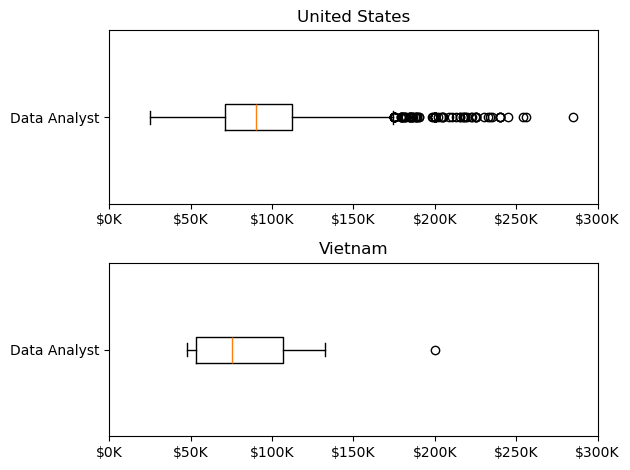

In [45]:
# option 2: using matplotlib
#Note: in subplots, the ax[i] is identifies in the beginning of the function, 'plt' is removed

fig, ax = plt.subplots(2,1)

country_list = ('United States', 'Vietnam')
for i, country in enumerate(country_list):
    df_final = df_DA[df_DA['job_country']==country]
    ax[i].boxplot(df_final.salary_year_avg, vert=False) # ax is identified in the beginning of the function
    ax[i].set_title(country)

    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    ax[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: 'Data Analyst'))
    ax[i].set_xlim(0,300_000)

fig.tight_layout()

## Create a plotbox with different job titles in the US

In [5]:
# plot with 3 different job titles
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
# Getting data for 3 job titles in the US
df_US = df[(df['job_country']== 'United States') & (df['job_title_short'].isin(job_titles))].copy()
# Removing NaN values
df_US = df_US.dropna(subset=['salary_year_avg'])

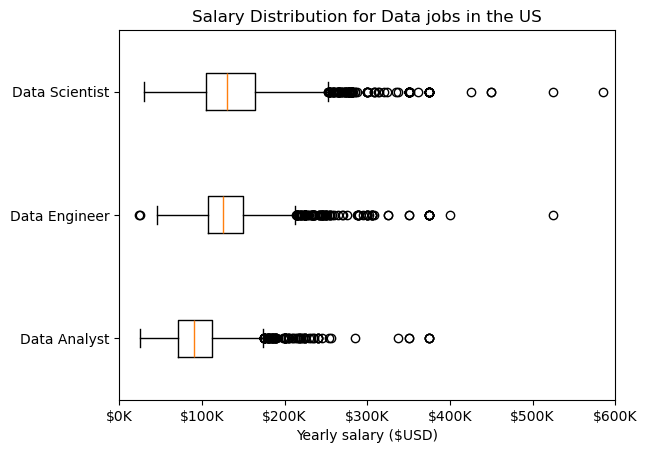

In [6]:
# Create a box plot: plt.boxplot(job_list_data, labels = job title)
# 1. Get the job_list

job_list_data = [df_US[df_US.job_title_short == job_name]['salary_year_avg'] for job_name in job_titles]

#2. Plotting
plt.boxplot(job_list_data, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution for Data jobs in the US')
plt.xlabel('Yearly salary ($USD)')

# Formatting the X axis values:
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.xlim(0,600_000)

plt.show()
